# Telco dataset

### Import librerie e dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

dataset = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.train.csv")
dataset

,Churn,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,No,4223-BKEOR,Female,0,No,Yes,21,Yes,No,DSL,...,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.8
1,No,6035-RIIOM,Female,0,No,No,54,Yes,Yes,Fiber optic,...,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45
2,Yes,3797-VTIDR,Male,0,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45
3,Yes,2568-BRGYX,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95
4,No,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,Yes,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,...,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95
5630,No,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3
5631,No,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05
5632,Yes,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15


### Preprocessing dati

In [2]:
#mapping Churn in 1 e 0
dataset.Churn = dataset.Churn.map({"Yes": 1, "No":0})

#porto questa colonna in yes/no
dataset.SeniorCitizen = dataset.SeniorCitizen.map({1:"Yes",0:"No"})

#colonne con "no internet service" da rimpiazzare
columns_with_no_internet = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                      'StreamingTV', 'StreamingMovies']
for c in columns_with_no_internet : 
    dataset[c]  = dataset[c].replace({'No internet service' : 'No'})

#Rimuovo i dati senza Total Charge e faccio diventare la colonna numerica
dataset['TotalCharges'] = dataset["TotalCharges"].replace(" ",np.nan)
dataset = dataset[dataset["TotalCharges"].notnull()]
dataset = dataset.reset_index()[dataset.columns]
dataset["TotalCharges"] = dataset["TotalCharges"].astype(float)

#creo tutti gli insiemi di "tipologie" di colonne per l'encoding e per poter selezionare i sottoinsiemi di
#colonne più rapidamente
customerID_column = ["customerID"]
y_column = ["Churn"]
categorical_columns   = dataset.nunique()[dataset.nunique() < 6].keys().tolist()
categorical_columns   = [c for c in categorical_columns if c not in y_column]
numerical_columns   = [c for c in dataset.columns if c not in categorical_columns + y_column + customerID_column]

#faccio encoding di tutte le colonne categoriche
le = LabelEncoder()
for c in categorical_columns :
    dataset[c] = le.fit_transform(dataset[c])
 
print(categorical_columns)
print(numerical_columns)
dataset

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
['tenure', 'MonthlyCharges', 'TotalCharges']


,Churn,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,4223-BKEOR,0,0,0,1,21,1,0,0,...,0,1,0,0,1,1,0,3,64.85,1336.80
1,0,6035-RIIOM,0,0,0,0,54,1,2,1,...,1,0,0,1,1,2,1,0,97.20,5129.45
2,1,3797-VTIDR,1,0,1,0,1,0,1,0,...,0,0,0,0,0,0,1,2,23.45,23.45
3,1,2568-BRGYX,1,0,0,0,4,1,0,1,...,0,0,0,0,0,0,1,2,70.20,237.95
4,0,4291-SHSBH,1,0,0,0,7,1,0,1,...,0,0,0,0,0,0,1,2,69.55,521.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5619,1,0684-AOSIH,1,0,1,0,1,1,0,1,...,0,0,0,1,1,0,1,2,95.00,95.00
5620,0,5982-PSMKW,0,0,1,1,23,1,2,0,...,1,1,1,1,1,2,1,1,91.10,2198.30
5621,0,8044-BGWPI,1,0,1,1,12,1,0,2,...,0,0,0,0,0,0,1,2,21.15,306.05
5622,1,7450-NWRTR,1,1,0,0,12,1,2,1,...,0,1,0,1,1,0,1,2,99.45,1200.15


Min & Max of tenure: 1 72
Min & Max of monthly charges: 18.25 118.6
Min & Max of total charges: 18.8 8684.8


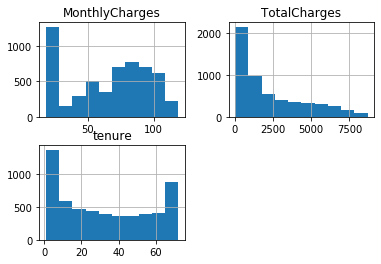

In [3]:
# Semplici stampe e istogramma per le colonne numeriche
print("Min & Max of tenure:",dataset.tenure.min(),dataset.tenure.max())
print("Min & Max of monthly charges:",dataset.MonthlyCharges.min(),dataset.MonthlyCharges.max())
print("Min & Max of total charges:",dataset.TotalCharges.min(),dataset.TotalCharges.max())
hist = dataset.hist(numerical_columns)

Min & Max of tenure: -1.2878323115175538 1.6213051545008281
Min & Max of monthly charges: -1.5513060487374086 1.784916793779102
Min & Max of total charges: -1.00415576293744 2.825358266897744


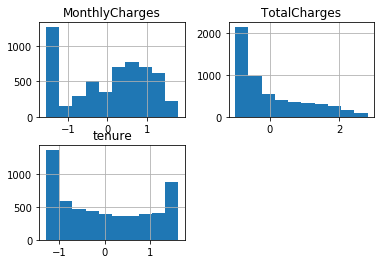

In [4]:
# Utilizzo uno standard scaler per standardizzare la serie di valori (aumentando le performance del modello),
# ovvero sottraggo la media ai valori e divido il risultato per la deviazione standard
std = StandardScaler()
scaled = std.fit_transform(dataset[numerical_columns])
scaled = pd.DataFrame(scaled,columns=numerical_columns)
dataset.tenure = scaled.tenure
dataset.MonthlyCharges = scaled.MonthlyCharges
dataset.TotalCharges = scaled.TotalCharges

print("Min & Max of tenure:",dataset.tenure.min(),dataset.tenure.max())
print("Min & Max of monthly charges:",dataset.MonthlyCharges.min(),dataset.MonthlyCharges.max())
print("Min & Max of total charges:",dataset.TotalCharges.min(),dataset.TotalCharges.max())
hist = dataset.hist(numerical_columns)

### Split dataset

In [5]:
data = dataset.drop(customerID_column, axis=1)

train, test = train_test_split(data, test_size=0.20)
y_train = train.Churn
y_test = test.Churn
x_train = train.loc[:, train.columns != "Churn"]
x_test = test.loc[:, train.columns != "Churn"]

print("train", train.shape)
print("test", test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)
print("x_train", x_train.shape)
print("x_test", x_test.shape)

data

train (4499, 20)
test (1125, 20)
y_train (4499,)
y_test (1125,)
x_train (4499, 19)
x_test (1125, 19)


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,0,1,-0.468357,1,0,0,1,0,1,0,0,1,1,0,3,-0.002049,-0.421730
1,0,0,0,0,0,0.883777,1,2,1,0,1,0,0,1,1,2,1,0,1.073455,1.254246
2,1,1,0,1,0,-1.287832,0,1,0,0,0,0,0,0,0,0,1,2,-1.378428,-1.002101
3,1,1,0,0,0,-1.164911,1,0,1,0,0,0,0,0,0,0,1,2,0.175817,-0.907313
4,0,1,0,0,0,-1.041990,1,0,1,0,0,0,0,0,0,0,1,2,0.154207,-0.782078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5619,1,1,0,1,0,-1.287832,1,0,1,1,0,0,0,1,1,0,1,2,1.000314,-0.970483
5620,0,0,0,1,1,-0.386409,1,2,0,1,1,1,1,1,1,2,1,1,0.870655,-0.041033
5621,0,1,0,1,1,-0.837121,1,0,2,0,0,0,0,0,0,0,1,2,-1.454893,-0.877220
5622,1,1,1,0,0,-0.837121,1,2,1,0,0,1,0,1,1,0,1,2,1.148258,-0.482116


### Loop per verificare l'accuracy al variare di alcuni parametri e di diversi modelli

#### LogisticRegression

In [6]:
from sklearn.linear_model import LogisticRegression

train_score=[]
test_score=[]
for c in [0.001,0.01,0.1,1,10,100,1000]:
    logreg = LogisticRegression(C=c, random_state=0)
    logreg.fit(x_train, y_train)
    print("Parametro C:", c)
    print("Accuracy on training set: {:.8f}".format(logreg.score(x_train, y_train)))
    train_score.append(logreg.score(x_train, y_train))
    print("Accuracy on test set: {:.8f}".format(logreg.score(x_test, y_test)))
    test_score.append(logreg.score(x_test, y_test))

Parametro C: 0.001
Accuracy on training set: 0.74172038
Accuracy on test set: 0.74755556
Parametro C: 0.01
Accuracy on training set: 0.79350967
Accuracy on test set: 0.79644444
Parametro C: 0.1
Accuracy on training set: 0.80217826
Accuracy on test set: 0.81066667
Parametro C: 1
Accuracy on training set: 0.80084463
Accuracy on test set: 0.80533333
Parametro C: 10
Accuracy on training set: 0.80106690
Accuracy on test set: 0.80444444
Parametro C: 100
Accuracy on training set: 0.80106690
Accuracy on test set: 0.80533333
Parametro C: 1000
Accuracy on training set: 0.80084463
Accuracy on test set: 0.80533333


#### KNeighborsClassifier

In [7]:
from sklearn.neighbors import KNeighborsClassifier

train_score=[]
test_score=[]
for n in range(1,11):
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(x_train, y_train)
    print("Neighbors:", n)
    print("Accuracy on training set: {:.8f}".format(clf.score(x_train, y_train)))
    train_score.append(clf.score(x_train, y_train))
    print("Accuracy on test set: {:.8f}".format(clf.score(x_test, y_test)))
    test_score.append(clf.score(x_test, y_test))

Neighbors: 1
Accuracy on training set: 0.99866637
Accuracy on test set: 0.73244444
Neighbors: 2
Accuracy on training set: 0.86797066
Accuracy on test set: 0.75822222
Neighbors: 3
Accuracy on training set: 0.86108024
Accuracy on test set: 0.75822222
Neighbors: 4
Accuracy on training set: 0.84240942
Accuracy on test set: 0.77688889
Neighbors: 5
Accuracy on training set: 0.83596355
Accuracy on test set: 0.76088889
Neighbors: 6
Accuracy on training set: 0.82418315
Accuracy on test set: 0.76888889
Neighbors: 7
Accuracy on training set: 0.82151589
Accuracy on test set: 0.78133333
Neighbors: 8
Accuracy on training set: 0.82151589
Accuracy on test set: 0.78488889
Neighbors: 9
Accuracy on training set: 0.81795955
Accuracy on test set: 0.78222222
Neighbors: 10
Accuracy on training set: 0.81707046
Accuracy on test set: 0.78488889


#### DecisionTreeClassifier

In [8]:
from sklearn.tree import DecisionTreeClassifier

train_score=[]
test_score=[]
for i in range(1,11):
    tree = DecisionTreeClassifier(max_depth=i,random_state=0)
    tree.fit(x_train, y_train)
    print("Max_depth:", i)
    print("Accuracy on training set: {:.8f}".format(tree.score(x_train, y_train)))
    train_score.append(tree.score(x_train, y_train))
    print("Accuracy on test set: {:.8f}".format(tree.score(x_test, y_test)))
    test_score.append(tree.score(x_test, y_test))

Max_depth: 1
Accuracy on training set: 0.73282952
Accuracy on test set: 0.73866667
Max_depth: 2
Accuracy on training set: 0.74394310
Accuracy on test set: 0.75911111
Max_depth: 3
Accuracy on training set: 0.78550789
Accuracy on test set: 0.78666667
Max_depth: 4
Accuracy on training set: 0.79106468
Accuracy on test set: 0.79111111
Max_depth: 5
Accuracy on training set: 0.79328740
Accuracy on test set: 0.78933333
Max_depth: 6
Accuracy on training set: 0.80617915
Accuracy on test set: 0.77777778
Max_depth: 7
Accuracy on training set: 0.81795955
Accuracy on test set: 0.76266667
Max_depth: 8
Accuracy on training set: 0.83107357
Accuracy on test set: 0.76533333
Max_depth: 9
Accuracy on training set: 0.85352301
Accuracy on test set: 0.76355556
Max_depth: 10
Accuracy on training set: 0.87641698
Accuracy on test set: 0.75022222


### Modello della soluzione

In [9]:
from sklearn.linear_model import LogisticRegression

train_score=[]
test_score=[]
logreg = LogisticRegression(C=0.1)
logreg.fit(x_train, y_train)
print("Accuracy on training set: {:.8f}".format(logreg.score(x_train, y_train)))
print("Accuracy on test set: {:.8f}".format(logreg.score(x_test, y_test)))

Accuracy on training set: 0.80217826
Accuracy on test set: 0.81066667
